In [1]:
#Mounting drive in colab  

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [83]:
'''
Unzipping good classified data
'''
from zipfile import ZipFile 
  
# specifying the good file name 
file_name = "/content/drive/My Drive/good.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

Extracting all the files now...
Done!


In [84]:
'''
Unzipping bad classified data
'''  
# specifying the good file name 
file_name = "/content/drive/My Drive/bad.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

Extracting all the files now...
Done!


In [85]:
#reading the names of each file

from os import walk
mypath_good ='/content/good'
mypath_bad ='/content/bad'
good = []
bad = []
for (dirpath, dirnames, filenames) in walk(mypath_good):
    good.extend(filenames)
    break
for (dirpath, dirnames, filenames) in walk(mypath_bad):
    bad.extend(filenames)
    break
f = [good,bad]
print(len(f))
print(len(f[0]))
print(len(f[1]))


2
424
2104


In [0]:
import matplotlib.image as mpimg 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [0]:
'''
Loading the data into array and augmenting data using flipping
'''

def make_data(path,f,size):
  y =[]
  data = []
  for i in range(len(f)):
    if i==0:
      mypath = path+'/good/'
    else:
      mypath = path+'/bad/'
    for file in f[i]:
      filename = mypath+file
      x = mpimg.imread(filename)
      x = cv2.resize(x,(size,size))
      x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
      rimg=cv2.flip(x,1)
      rimg = rimg.astype('float32') / 255
      data.append(rimg)
      y.append(i)
      x = x.astype('float32') / 255
      data.append(x)

      y.append(i)
  data = np.array(data)
  
  y = np.array(y)
  return data,y

In [0]:
size = 64
X,y = make_data('/content',f,size)


In [90]:
print('dimension of the data = ',X.shape)
print('dimension of the data = ',y.shape)

dimension of the data =  (5056, 64, 64)
dimension of the data =  (5056,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify= y)

In [92]:
print('dimension of X_training data = ',X_train.shape)
print('dimension of X_testing data = ',X_test.shape)
print('dimension of y_training data = ',y_train.shape)
print('dimension of y_testing data = ',y_test.shape)

dimension of X_training data =  (4044, 64, 64)
dimension of X_testing data =  (1012, 64, 64)
dimension of y_training data =  (4044,)
dimension of y_testing data =  (1012,)


In [93]:
X_train = X_train.reshape((4044,size,size,1))
X_test = X_test.reshape((1012,size,size,1))
print('dimension of X_training data = ',X_train.shape)
print('dimension of X_testing data = ',X_test.shape)
print('dimension of y_training data = ',y_train.shape)
print('dimension of y_testing data = ',y_test.shape)

dimension of X_training data =  (4044, 64, 64, 1)
dimension of X_testing data =  (1012, 64, 64, 1)
dimension of y_training data =  (4044,)
dimension of y_testing data =  (1012,)


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras import regularizers
from keras.layers import Dense

In [0]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (size, size,1), activation = 'relu'))
#classifier.add(Conv2D(64, (3, 3),  activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
classifier.add(Conv2D(64, (3, 3),  activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
classifier.add(Flatten())

classifier.add(Dense(units = 10, activation = 'relu'))
#classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [96]:
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                125450    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [97]:
classifier.fit(X_train,y_train, batch_size=64, epochs=5)

Epoch 1/5
4044/4044 [==============================] - 3s 684us/step - loss: 0.4774 - acc: 0.8234
Epoch 2/5
4044/4044 [==============================] - 2s 503us/step - loss: 0.4451 - acc: 0.8323
Epoch 3/5
4044/4044 [==============================] - 2s 507us/step - loss: 0.4191 - acc: 0.8323
Epoch 4/5
4044/4044 [==============================] - 2s 502us/step - loss: 0.3944 - acc: 0.8323
Epoch 5/5
4044/4044 [==============================] - 2s 498us/step - loss: 0.3856 - acc: 0.8323


In [0]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.8)   #set threshol

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 83  87]
 [185 657]]


In [100]:

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict(X_test))
auc_test = roc_auc_score(y_test, classifier.predict(X_test))
auc_train = roc_auc_score(y_train, classifier.predict(X_train))
print('AUC test: %.3f' % auc_test)
print('AUC train: %.3f' % auc_train)
roc_auc = metrics.auc(fpr, tpr)

AUC test: 0.746
AUC train: 0.807


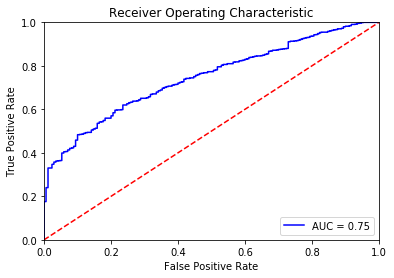

In [101]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [102]:
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
